In [1]:
import pandas as pd

# File path
file_path = "/storage/work/amd7293/NREL/autonomie_agnl/ANL - TAPS-2303 Report - Light Duty - Autonomie Results.xlsx"  # Update with the actual file path

# Read data from Excel
anl_raw = pd.read_excel(file_path, sheet_name="Autonomie results")


# Select and rename columns
anl = anl_raw[[
    "Model Years: {years}", 
    "Vehicle Performance Category: {string}",
    "Vehicle Powertrain: {string}",
    "Technology Progress: {string}",
    "Vehicle Class: {string}",
    "Adjusted Fuel Economy, Combined 55/45 - sticker, CS, Fuel (Gas.Equivalent): {mile/gallon}",
    "Adjusted Electricity Consumption, Combined 55/45 - sticker, CD (Wh/mi)",
    "Adjusted Fuel Economy, Combined 43/57 - real world, CS, Fuel (Gas.Equivalent): {mile/gallon}",
    "Adjusted Electricity Consumption, Combined 43/57 - real world, CD (Wh/mi)",
    "Utility-weighted Adjusted PHEV Fuel Economy on Combined, (Gas. Equivalent): {mile/gallon}",
    "Utility-weighted Adjusted PHEV Electrical Consumption on Combined: {W.h/mile}",                
    "Vehicle MSRP {2023$}",
    "High Voltage Battery Manufacturing Cost {2020}",
    "Battery Total Energy Beginning of Life: {Wh}",
    "Battery Usable Energy Beginning of Life: {Wh}",
]].rename(columns={
    "Model Years: {years}": "model_year",
    "Vehicle Performance Category: {string}": "performance",
    "Vehicle Powertrain: {string}": "powertrain",
    "Technology Progress: {string}": "tech_progress",
    "Vehicle Class: {string}": "class",
    "Adjusted Fuel Economy, Combined 55/45 - sticker, CS, Fuel (Gas.Equivalent): {mile/gallon}": "cs_55_45",
    "Adjusted Electricity Consumption, Combined 55/45 - sticker, CD (Wh/mi)": "cd_55_45",
    "Adjusted Fuel Economy, Combined 43/57 - real world, CS, Fuel (Gas.Equivalent): {mile/gallon}": "cs_43_57",
    "Adjusted Electricity Consumption, Combined 43/57 - real world, CD (Wh/mi)": "cd_43_57",
    "Utility-weighted Adjusted PHEV Fuel Economy on Combined, (Gas. Equivalent): {mile/gallon}": "uw_fe_comb",
    "Utility-weighted Adjusted PHEV Electrical Consumption on Combined: {W.h/mile}": "uw_ec_comb",                
    "Vehicle MSRP {2023$}": "msrp",
    "High Voltage Battery Manufacturing Cost {2020}": "battery_cost",
    "Battery Total Energy Beginning of Life: {Wh}": "battery_wh_total",
    "Battery Usable Energy Beginning of Life: {Wh}": "battery_wh_usable"
})

# Ensure the DataFrame is displayed or processed as needed
#print(anl.head())


# Example: Filtering based on a condition
anl = anl[anl['performance'] == 'Base']

# 'kwhpergge' is defined
kwhpergge = 33.7

# Select correct fuel economy/fuel consumption values. Utility weighted PHEV is based on 55/45
anl['fe_cs'] = anl['cs_55_45']
anl['fe_cd'] = 1 / (anl['cd_55_45'] / 1000) * kwhpergge
anl['uw_fc'] = anl['uw_fe_comb']
anl['uw_ec'] = anl['uw_ec_comb'] / 1000

# Select powertrains
powertrains = ["BEV200", "BEV300", "BEV400", "EREVPHEV 25AER", "EREVPHEV 50AER"]
anl = anl[anl['powertrain'].isin(powertrains)]

# Add year (representing model year)
anl['Year'] = anl['model_year']

# Selecting specific columns for 'tanl'
tanl_columns = ['Year', 'tech_progress', 'powertrain', 'class', 'fe_cs', 'fe_cd', 'uw_fc', 'uw_ec', 'msrp', 'battery_cost', 'battery_wh_total', 'battery_wh_usable']
tanl = anl[tanl_columns]
tanl

,Year,tech_progress,powertrain,class,fe_cs,fe_cd,uw_fc,uw_ec,msrp,battery_cost,battery_wh_total,battery_wh_usable
65,2005,Low,BEV200,Compact,NaN,150.857710,NaN,NaN,31697.540390,9281.124310,54594.84888,43675.87910
66,2005,Low,BEV200,Midsize,NaN,141.797379,NaN,NaN,37693.829189,9965.470176,58620.41280,46896.33024
67,2005,Low,BEV200,Midsize SUV,NaN,108.521901,NaN,NaN,47966.783732,12848.755788,75580.91640,60464.73312
68,2005,Low,BEV200,Pickup,NaN,88.107787,NaN,NaN,56001.173503,15656.444834,92096.73432,73677.38746
69,2005,Low,BEV200,Small SUV,NaN,118.815031,NaN,NaN,43988.424843,11725.356960,68972.68800,55178.15040
...,...,...,...,...,...,...,...,...,...,...,...,...
645,2050,Low,EREVPHEV 50AER,Compact,65.186909,185.932923,290.978342,0.141000,24406.813049,1627.414157,11301.48720,9041.18976
646,2050,Low,EREVPHEV 50AER,Midsize,61.409947,171.891014,265.051666,0.150337,28868.723683,1722.514637,11961.90720,9569.52576
647,2050,Low,EREVPHEV 50AER,Midsize SUV,49.767732,130.977838,199.696901,0.196804,34560.924376,2238.312269,15543.83520,12435.06816
648,2050,Low,EREVPHEV 50AER,Pickup,41.811544,107.780129,162.633440,0.238722,38609.660784,2741.687585,19039.49712,15231.59770


In [57]:
tanl['Year'].unique()

array([2005, 2010, 2015, 2023, 2025, 2030, 2035, 2050])

In [2]:
# Assuming 'tanl' is a pandas DataFrame and 'kwhpergge' is defined
kwhpergge = 33.7

# Tech Transformations
powertrain_to_tech_mapping = {
    "BEV200": "BEV_200",
    "BEV300": "BEV_300",
    "BEV400": "BEV_400",
    "EREVPHEV 25AER": "PHEV_25",
    "EREVPHEV 50AER": "PHEV_50",
}

tanl['Tech'] = tanl['powertrain'].map(powertrain_to_tech_mapping)

# Class Transformations
class_mapping = {
    "Compact": "Compact",
    "Midsize": "Midsize",
    "Small SUV": "SUV",
    "Midsize SUV": "SUV",
    "Pickup": "Pickup"
}

tanl['Class'] = tanl['class'].map(class_mapping)

# Calculate combined fuel economy
bev_list = ["BEV_200", "BEV_300", "BEV_400"]
phev_list = ["PHEV_25", "PHEV_50"]
other_list = ["ICEV_Gasoline", "HEV_Gasoline", "FCEV", "ICEV_NG"]

tanl['fe_comb'] = tanl.apply(
    lambda row: row['fe_cd'] if row['Tech'] in bev_list else
                (1 / (1 / row['uw_fc'] + row['uw_ec'] / kwhpergge)) if row['Tech'] in phev_list else
                row['fe_cs'],
    axis=1
)

# Aggregation by Year, Tech Progress, Tech, and Class
aggregated = tanl.groupby(['Year', 'tech_progress', 'Tech', 'Class']).agg({
    'fe_cs': 'mean',
    'fe_cd': 'mean',
    'fe_comb': 'mean',
    'msrp': 'mean',
    'battery_cost': 'mean',
    'battery_wh_total': 'mean',
    'battery_wh_usable': 'mean'
}).reset_index()


/tmp/ipykernel_3280411/1665893566.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tanl['Tech'] = tanl['powertrain'].map(powertrain_to_tech_mapping)
/tmp/ipykernel_3280411/1665893566.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tanl['Class'] = tanl['class'].map(class_mapping)
/tmp/ipykernel_3280411/1665893566.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [3]:
aggregated.Tech.unique()

array(['BEV_200', 'BEV_300', 'BEV_400', 'PHEV_50'], dtype=object)

In [4]:
aggregated

,Year,tech_progress,Tech,Class,fe_cs,fe_cd,fe_comb,msrp,battery_cost,battery_wh_total,battery_wh_usable
0,2005,Low,BEV_200,Compact,NaN,150.857710,150.857710,31697.540390,9281.124310,54594.84888,43675.879100
1,2005,Low,BEV_200,Midsize,NaN,141.797379,141.797379,37693.829189,9965.470176,58620.41280,46896.330240
2,2005,Low,BEV_200,Pickup,NaN,88.107787,88.107787,56001.173503,15656.444834,92096.73432,73677.387460
3,2005,Low,BEV_200,SUV,NaN,113.668466,113.668466,45977.604287,12287.056374,72276.80220,57821.441760
4,2005,Low,BEV_300,Compact,NaN,140.974144,140.974144,40243.370264,14741.904226,86717.08368,69373.666940
...,...,...,...,...,...,...,...,...,...,...,...
203,2050,Low,BEV_400,SUV,NaN,138.302309,138.302309,35634.979727,9121.120862,101345.78736,95265.040120
204,2050,Low,PHEV_50,Compact,65.186909,185.932923,131.222235,24406.813049,1627.414157,11301.48720,9041.189760
205,2050,Low,PHEV_50,Midsize,61.409947,171.891014,121.449194,28868.723683,1722.514637,11961.90720,9569.525760
206,2050,Low,PHEV_50,Pickup,41.811544,107.780129,75.571248,38609.660784,2741.687585,19039.49712,15231.597700


In [54]:
# For ev_df
aggregated_compared = aggregated[(aggregated['Year'] >= 2010) & (aggregated['Year'] <= 2025)]

In [56]:
aggregated_compared['Year'].unique()

array([2010, 2015, 2023, 2025])

In [7]:
aggregated_compared.to_csv('combined_anl.csv', index=False)


In [45]:
anl_df = pd.read_csv('/storage/work/amd7293/NREL/tempo/output/combined_anl.csv')
epa_df = pd.read_csv('/storage/work/amd7293/NREL/tempo/output/combined_epa.csv')
bc_df = pd.read_csv('/storage/work/amd7293/NREL/tempo/output/imputed)battery_cost.csv')


In [46]:
# Merge to bring in 'battery_cost' from grouped_df, using left join to keep all rows from grouped_df_imputed
epa_df_imputed = pd.merge(bc_df, epa_df, how='left', on=['year', 'Tech', 'class'])

# Fill missing 'battery_cost' with 0
epa_df_imputed['battery_cost'] = epa_df_imputed['battery_cost'].fillna(0)
epa_df_imputed['weighted msrp'] = epa_df_imputed['weighted msrp'].fillna(0)


epa_df_imputed['std'] = epa_df_imputed['std'].fillna(0)


In [47]:
epa_df_imputed

,Unnamed: 0,year,Tech,class,battery_cost,std,imputed,weighted fe_comb,weighted range,weighted msrp,weighted combinedUF
0,0,2012,BEV_200,SUV,24664.160000,6449.108001,0,440.0,103.0,49800.0,NaN
1,1,2012,BEV_200,Midsize,12406.013333,5001.277372,0,340.0,73.0,37250.0,NaN
2,2,2012,BEV_200,Compact,10788.352000,0.000000,0,320.0,76.0,39200.0,NaN
3,3,2012,BEV_300,SUV,44670.520000,0.000000,0,380.0,265.0,105400.0,NaN
4,4,2012,BEV_300,Midsize,19125.863319,0.000000,1,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
94,94,2022,BEV_300,Midsize,13672.347837,1686.780345,0,NaN,NaN,0.0,NaN
95,95,2022,BEV_300,Compact,15102.075962,253.713268,0,NaN,NaN,0.0,NaN
96,96,2022,BEV_400,SUV,18116.315939,2601.834853,0,NaN,NaN,0.0,NaN
97,97,2022,BEV_400,Midsize,14275.306215,149.167151,0,NaN,NaN,0.0,NaN


In [48]:
epa_df

,year,Tech,class,weighted fe_comb,weighted range,weighted msrp,weighted combinedUF
0,1999,BEV_200,Midsize,NaN,NaN,NaN,NaN
1,1999,BEV_200,Pickup,NaN,NaN,NaN,NaN
2,1999,BEV_200,Compact,NaN,NaN,NaN,NaN
3,2000,BEV_200,SUV,NaN,NaN,NaN,NaN
4,2001,BEV_200,SUV,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
163,2024,PHEV_50,Midsize,NaN,NaN,NaN,NaN
164,2024,PHEV_50,Pickup,NaN,NaN,NaN,NaN
165,2024,PHEV_50,SUV,NaN,NaN,NaN,NaN
166,2024,PHEV_25,Compact,NaN,NaN,NaN,NaN


In [49]:
anl_2015 = anl_df[anl_df['Year'] == 2015]
epa_2015 = epa_df_imputed[epa_df_imputed['year'] == 2015]

In [50]:
# Filter epa_2015 for relevant data
bev_200_data = epa_2015[(epa_2015['Tech'] == 'BEV_200') & (epa_2015['class'].isin(['SUV', 'Compact', 'Midsize']))]

# Create a dictionary to map class to its corresponding weighted msrp
class_to_msrp = bev_200_data.set_index('class')['weighted msrp'].to_dict()

# Update 'weighted_msrp' in grouped_df_imputed where imputed = 1
for index, row in epa_2015[epa_2015['imputed'] == 1].iterrows():
    class_type = row['class']
    if class_type in class_to_msrp:
        specific_msrp = class_to_msrp[class_type]
        new_weighted_msrp = 1.5 * (specific_msrp / 1.5 + row['battery_cost'])
        epa_2015.at[index, 'weighted msrp'] = new_weighted_msrp


In [51]:
epa_2015

,Unnamed: 0,year,Tech,class,battery_cost,std,imputed,weighted fe_comb,weighted range,weighted msrp,weighted combinedUF
27,27,2015,BEV_200,SUV,7862.028494,0.000000,0,319.856000,93.000000,35700.000000,NaN
28,28,2015,BEV_200,Midsize,6503.604992,1366.219223,0,285.789307,82.760429,36902.597503,NaN
29,29,2015,BEV_200,Compact,6511.511526,170.906167,0,320.000000,76.000000,29170.000000,NaN
30,30,2015,BEV_300,SUV,23759.248500,2547.220155,0,355.000000,253.000000,80800.000000,NaN
31,31,2015,BEV_300,Midsize,9975.514165,0.000000,1,NaN,NaN,51865.868751,NaN
32,32,2015,BEV_300,Compact,9746.487491,0.000000,1,NaN,NaN,43789.731237,NaN
33,33,2015,BEV_400,SUV,15569.446108,0.000000,1,NaN,NaN,59054.169162,NaN
34,34,2015,BEV_400,Midsize,12127.600099,0.000000,1,NaN,NaN,55093.997652,NaN
35,35,2015,BEV_400,Compact,12920.780739,0.000000,1,NaN,NaN,48551.171109,NaN


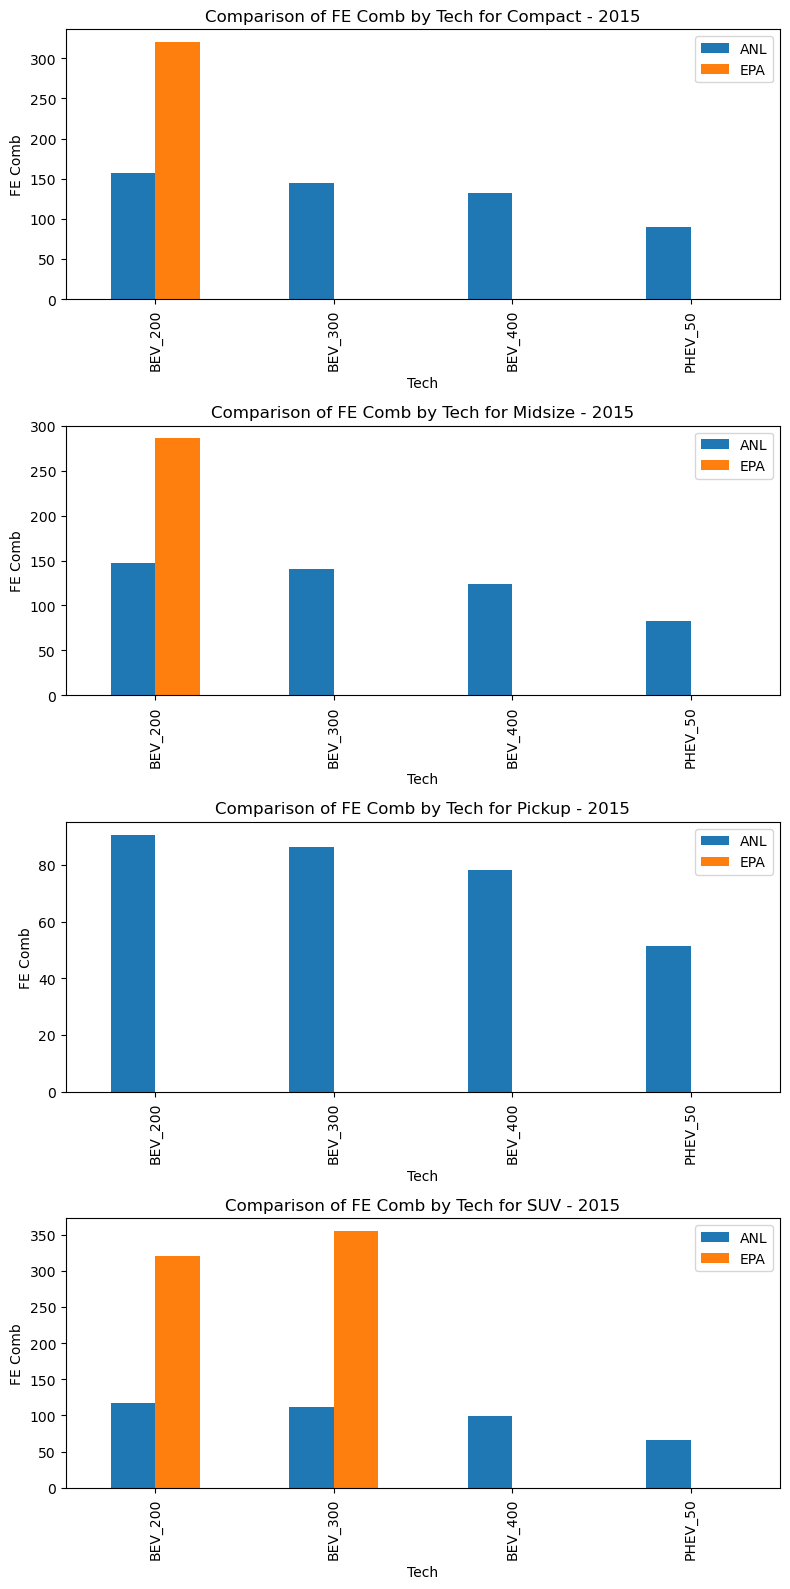

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming anl_df and epa_df are already loaded
# If not, load them using pd.read_csv

# Filter the data for the year 2015 and for the specific technologies
techs = ['BEV_200', 'BEV_300', 'BEV_400', 'PHEV_25', 'PHEV_50']
anl_2015 = anl_df[(anl_df['Year'] == 2015) & (anl_df['Tech'].isin(techs))]
#epa_2015 = epa_df[(epa_df['year'] == 2015) & (epa_df['Tech'].isin(techs))]

# Get the unique vehicle classes
vehicle_classes = anl_2015['Class'].unique()

# Creating subplots for each vehicle class
fig, axes = plt.subplots(nrows=len(vehicle_classes), ncols=1, figsize=(8, 4 * len(vehicle_classes)))

# Iterate over each class and create a combined comparison plot
for i, vehicle_class in enumerate(vehicle_classes):
    # Filter data for the current class
    anl_class_data = anl_2015[anl_2015['Class'] == vehicle_class]
    epa_class_data = epa_2015[epa_2015['class'] == vehicle_class]

    # Group and calculate the mean 'fe_comb' for each tech in the ANL and EPA datasets
    anl_grouped = anl_class_data.groupby('Tech')['fe_comb'].mean()
    epa_grouped = epa_class_data.groupby('Tech')['weighted fe_comb'].mean()

    # Combine ANL and EPA data for plotting
    combined_data = pd.DataFrame({'ANL': anl_grouped, 'EPA': epa_grouped})
    
    # Plotting combined data
    combined_data.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Comparison of FE Comb by Tech for {vehicle_class} - 2015')
    axes[i].set_ylabel('FE Comb')
    axes[i].set_xlabel('Tech')

plt.tight_layout()
plt.show()



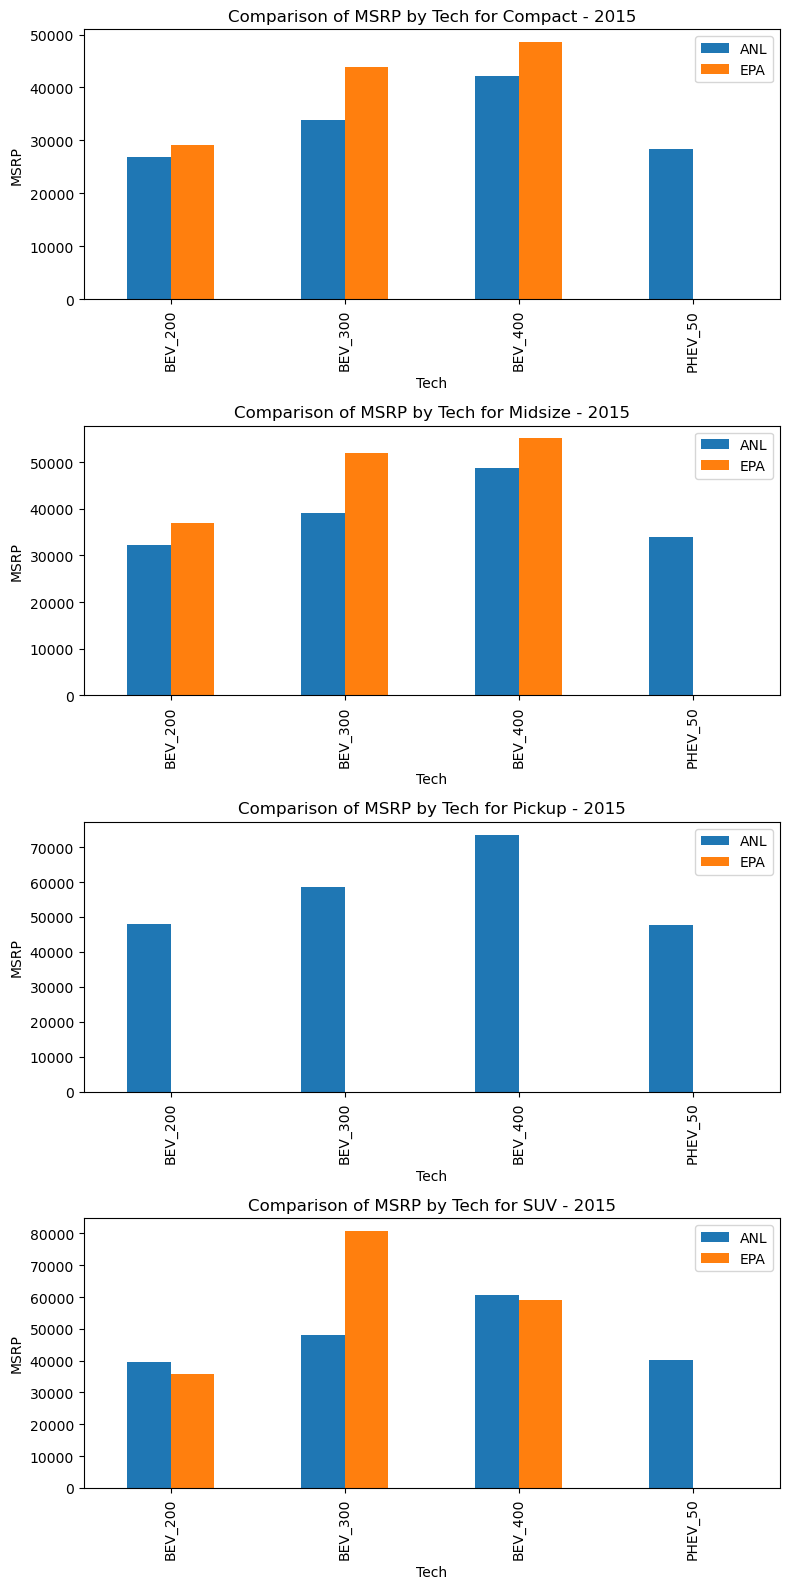

In [53]:
# Creating subplots for each vehicle class
fig, axes = plt.subplots(nrows=len(vehicle_classes), ncols=1, figsize=(8, 4 * len(vehicle_classes)))

# Iterate over each class and create a combined comparison plot
for i, vehicle_class in enumerate(vehicle_classes):
    # Filter data for the current class
    anl_class_data = anl_2015[anl_2015['Class'] == vehicle_class]
    epa_class_data = epa_2015[epa_2015['class'] == vehicle_class]

    # Group and calculate the mean 'fe_comb' for each tech in the ANL and EPA datasets
    anl_grouped = anl_class_data.groupby('Tech')['msrp'].mean()
    epa_grouped = epa_class_data.groupby('Tech')['weighted msrp'].mean()

    # Combine ANL and EPA data for plotting
    combined_data = pd.DataFrame({'ANL': anl_grouped, 'EPA': epa_grouped})
    
    # Plotting combined data
    combined_data.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Comparison of MSRP by Tech for {vehicle_class} - 2015')
    axes[i].set_ylabel('MSRP')
    axes[i].set_xlabel('Tech')

plt.tight_layout()
plt.show()